# AirBnB capstone project




# Predicting Airbnb price with Machine Learning

### Exploring Data and Data Wrangling

In [1]:
import pandas as pd
import numpy as np

from IPython.display import display
import matplotlib.pyplot as plt

# Set iPython's max column width to 200
pd.set_option('display.max_columns', 200)

#reading raw data
in_file = 'listings.csv'
full_data = pd.read_csv(in_file)


full_data.head()
full_data.tail()

/Users/shabnam/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
8528,40544136,https://www.airbnb.com/rooms/40544136,20191204162709,2019-12-04,Entire apartment in Pacific Heights/beautiful ...,A place for zen with a beautiful patio and bac...,NaN,A place for zen with a beautiful patio and bac...,none,NaN,NaN,NaN,NaN,NaN,We would appreciate if don’t wear any shoes in...,NaN,NaN,https://a0.muscache.com/im/pictures/cac19a4c-0...,NaN,39425074,https://www.airbnb.com/users/show/39425074,Sam,2015-07-24,"San Francisco, California, United States",NaN,within a day,50%,NaN,f,https://a0.muscache.com/im/pictures/user/3cffe...,https://a0.muscache.com/im/pictures/user/3cffe...,NaN,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"San Francisco, CA, United States",NaN,Pacific Heights,NaN,San Francisco,CA,94115,San Francisco,"San Francisco, CA",US,United States,37.79017,-122.43869,f,Apartment,Entire home/apt,2,1.5,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Indoor fi...",NaN,$95.00,NaN,NaN,$0.00,$50.00,1,$0.00,30,180,30,30,180,180,30.0,180.0,yesterday,t,2,32,62,337,2019-12-04,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,"{""SAN FRANCISCO""}",t,f,flexible,f,f,2,1,1,0,NaN
8529,40546145,https://www.airbnb.com/rooms/40546145,20191204162709,2019-12-04,Huge Private Room; 8 min to Dwntwn SF & SFO,We are kind and friendly people looking for wo...,NaN,We are kind and friendly people looking for wo...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/b220ab0d-f...,NaN,313682675,https://www.airbnb.com/users/show/313682675,Connor,2019-12-02,US,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/b9a50...,https://a0.muscache.com/im/pictures/user/b9a50...,Bayview,0.0,0.0,"['email', 'phone']",t,f,"San Francisco, CA, United States",NaN,Bayview,NaN,San Francisco,CA,94124,San Francisco,"San Francisco, CA",US,United States,37.71977,-122.39214,t,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,"{Wifi,Heating,""Smoke detector"",""Carbon monoxid...",NaN,$55.00,NaN,NaN,NaN,NaN,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,today,t,30,59,59,59,2019-12-04,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,City Registration Pending,"{""SAN FRANCISCO""}",t,f,flexible,f,f,2,0,2,0,NaN
8530,40547706,https://www.airbnb.com/rooms/40547706,20191204162709,2019-12-04,Welcome onboard a beautiful Sail

In [2]:
type(full_data)

pandas.core.frame.DataFrame

In [3]:
full_data.shape

(8533, 106)

In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 6.9+ MB


In [5]:
#show all the columns name
full_data.columns
for col in full_data.columns:
    print(col)
    #full_data.col.unique()


id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

In [6]:
full_data.index

RangeIndex(start=0, stop=8533, step=1)

In [7]:
full_data.neighbourhood.unique()

array(['Duboce Triangle', 'Inner Sunset', 'Bernal Heights', 'Cole Valley',
       'Alamo Square', 'Mission District', 'Potrero Hill', 'Nob Hill',
       'Lower Haight', 'Hayes Valley', 'Union Square', 'Haight-Ashbury',
       'The Castro', 'South Beach', 'Noe Valley', 'Western Addition/NOPA',
       'Richmond District', 'Presidio Heights', 'Glen Park', 'Dogpatch',
       'Ingleside', 'Pacific Heights', 'Downtown', 'Financial District',
       'Twin Peaks', 'Russian Hill', 'Outer Sunset', 'Marina', 'Excelsior',
       'Chinatown', 'Civic Center', 'Tenderloin', 'Balboa Terrace',
       'Bayview', 'Telegraph Hill', 'Diamond Heights', 'Cow Hollow',
       'West Portal', 'North Beach', 'Mission Terrace', 'SoMa',
       'Sunnyside', 'Parkside', 'Lakeshore', "Fisherman's Wharf",
       'Crocker Amazon', 'Oceanview', 'Portola', 'Presidio', 'Forest Hill',
       'Visitacion Valley', 'Mission Bay', 'Sea Cliff', 'Japantown',
       'Daly City', nan], dtype=object)

In [8]:
#Get a series object containing the count of unique elements in each column of dataframe
uniqueValues = full_data.nunique().sort_values()
print("Count of unique values in each column:")
print(uniqueValues)

Count of unique values in each column:
xl_picture_url                         0
host_acceptance_rate                   0
medium_url                             0
neighbourhood_group_cleansed           0
thumbnail_url                          0
country_code                           1
scrape_id                              1
country                                1
has_availability                       1
experiences_offered                    1
is_business_travel_ready               1
host_is_superhost                      2
is_location_exact                      2
host_has_profile_pic                   2
host_identity_verified                 2
calendar_last_scraped                  2
jurisdiction_names                     2
instant_bookable                       2
require_guest_profile_picture          2
require_guest_phone_verification       2
last_scraped                           2
market                                 2
requires_license                       2
state             

In [9]:
#columns that have only one unique value can be dropped
columns_to_drop = ['country_code', 'scrape_id', 'country', 'has_availability', 'experiences_offered', 'is_business_travel_ready' ]   
df = full_data.drop(columns_to_drop, axis = 1)
#note: default axis is 0 which is row. needed to specify axis=1

df.shape


(8533, 100)

In [10]:
# URL columns are not needed , they will be dropped
columns_with_url = ['listing_url', 'thumbnail_url', 'medium_url', 'picture_url',
'xl_picture_url','host_thumbnail_url','host_picture_url','host_url']
df = df.drop(columns_with_url, axis = 1)

In [11]:
df.shape


(8533, 92)

In [ ]:
#full_data.iloc[2:3,]
#full_data.scrape_id

In [12]:
# this can be dropped as well last_scraped,calendar_last_scraped 
df.last_scraped.unique()
df.calendar_last_scraped.unique()

array(['2019-12-04', '2019-12-05'], dtype=object)

In [13]:
df = df.drop (['last_scraped','calendar_last_scraped'], axis = 1)

In [14]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 90 columns):
id                                              8533 non-null int64
name                                            8533 non-null object
summary                                         8320 non-null object
space                                           7325 non-null object
description                                     8492 non-null object
neighborhood_overview                           6422 non-null object
notes                                           5216 non-null object
transit                                         5927 non-null object
access                                          5289 non-null object
interaction                                     5730 non-null object
house_rules                                     6250 non-null object
host_id                                         8533 non-null int64
host_name                                       8479 non-null objec

,id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.533000e+03,8.533000e+03,0.0,8479.000000,8479.000000,0.0,8533.000000,8533.000000,8533.000000,8528.000000,8530.000000,8521.000000,126.000000,8533.000000,8.533000e+03,8.533000e+03,8.533000e+03,8.533000e+03,8.533000e+03,8.533000e+03,8.533000e+03,8.533000e+03,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,6601.000000,6596.000000,6596.000000,6595.000000,6597.000000,6595.000000,6595.000000,8533.000000,8533.000000,8533.000000,8533.000000,6642.000000
mean,2.138645e+07,6.773439e+07,NaN,101.524000,101.524000,NaN,37.766350,-122.429779,3.130435,1.403494,1.338804,1.726323,1041.857143,1.702098,1.173567e+04,1.225990e+04,1.173555e+04,1.174133e+04,1.018933e+06,1.018939e+06,1.174042e+04,1.018938e+06,10.966366,25.393179,41.709598,151.997539,44.785656,13.339623,95.524769,9.759248,9.611734,9.852464,9.825830,9.688400,9.383321,27.760811,21.381695,5.352045,0.675026,1.842879
std,1.283860e+07,8.606154e+07,NaN,340.811785,340.811785,NaN,0.022813,0.027010,1.897818,0.931233,0.927230,1.187167,826.489450,1.327286,1.082553e+06,1.082548e+06,1.082553e+06,1.082553e+06,4.649946e+07,4.649946e+07,1.082553e+06,4.649946e+07,11.246103,22.508991,34.473555,136.858553,79.476654,22.385516,7.258059,0.703041,0.804334,0.564258,0.629148,0.716657,0.840563,66.028408,58.987020,15.875233,3.354536,2.077444
min,9.580000e+02,2.800000e+01,NaN,0.000000,0.000000,NaN,37.704480,-122.513060,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.779327e+06,4.430421e+06,NaN,1.000000,1.000000,NaN,37.751770,-122.442520,2.000000,1.000000,1.000000,1.000000,500.000000,1.000000,2.000000e+00,2.900000e+01,2.000000e+00,2.000000e+00,2.900000e+01,2.900000e+01,2.000000e+00,2.900000e+01,0.000000,0.000000,1.000000,13.000000,1.000000,0.000000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.290000
50%,2.259754e+07,2.374145e+07,NaN,2.000000,2.000000,NaN,37.769780,-122.424060,2.000000,1.000000,1.000000,1.000000,851.500000,1.000000,4.000000e+00,1.800000e+02,4.000000e+00,5.000000e+00,2.100000e+02,3.600000e+02,4.000000e+00,3.559000e+02,8.000000,24.000000,44.000000,112.000000,9.000000,2.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,3.270356e+07,1.074344e+08,NaN,16.000000,16.000000,NaN,37.785570,-122.410500,4.000000,1.500000,2.000000,2.000000,1497.500000,2.000000,3.000000e+01,1.125000e+03,3.000000e+01,3.000000e+01,1.125000e+03,1.125000e+03,3.000000e+01,1.125000e+03,21.000000,46.000000,75.000000,304.000000,52.000000,17.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,11.000000,2.000000,2.000000,0.000000,2.780000
max,4.056928e+07,3.136827e+08,NaN,1768.000000,1768.000000,NaN,37.828790,-122.368570,16.000000,14.000000,16.000000,14.000000,5500.000000,16.000000,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,2.147484e+09,2.147484e+09,1.000000e+08,2.147484e+09,

In [15]:
# we can see the values for these 2 columns are all null 
#so we can drop trhem (host_acceptance_rate,neighbourhood_group_cleansed)

df.host_acceptance_rate.value_counts(dropna=False)
df.neighbourhood_group_cleansed.value_counts(dropna=False)

NaN    8533
Name: neighbourhood_group_cleansed, dtype: int64

In [16]:
# dropping host_acceptance_rate,neighbourhood_group_cleansed

null_columns = ['host_acceptance_rate', 'neighbourhood_group_cleansed']
df = df.drop (null_columns , axis = 1)

In [17]:
df.shape

(8533, 88)

In [18]:
# dropping more columns that are more text since I will not be using NLP
text_col_to_drop = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules','host_name', 'host_location', 'host_about', 'host_neighbourhood', 'host_verifications']
df = df.drop(text_col_to_drop, axis=1)


In [19]:
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 73 columns):
id                                              8533 non-null int64
host_id                                         8533 non-null int64
host_since                                      8479 non-null object
host_response_time                              7533 non-null object
host_response_rate                              7533 non-null object
host_is_superhost                               8479 non-null object
host_listings_count                             8479 non-null float64
host_total_listings_count                       8479 non-null float64
host_has_profile_pic                            8479 non-null object
host_identity_verified                          8479 non-null object
street                                          8533 non-null object
neighbourhood                                   8523 non-null object
neighbourhood_cleansed                          8533 non-null obj

In [20]:
# we need to clean this. San Francisco is typed differently where it is only one value
#df.smart_location.value_counts(dropna=False)
#df.city.value_counts(dropna=False)
#df.host_is_superhost.unique()
#columns that have mostly nul lwill be dropped
df.isnull().sum().sort_values(ascending=False)

square_feet                                     8407
monthly_price                                   7507
weekly_price                                    7480
license                                         3243
review_scores_location                          1938
review_scores_checkin                           1938
review_scores_value                             1938
review_scores_accuracy                          1937
review_scores_cleanliness                       1937
review_scores_communication                     1936
review_scores_rating                            1932
first_review                                    1891
last_review                                     1891
reviews_per_month                               1891
security_deposit                                1759
host_response_rate                              1000
host_response_time                              1000
cleaning_fee                                     959
zipcode                                       

In [21]:
df.drop(['square_feet', 'monthly_price', 'weekly_price', 'license'], axis=1, inplace = True)

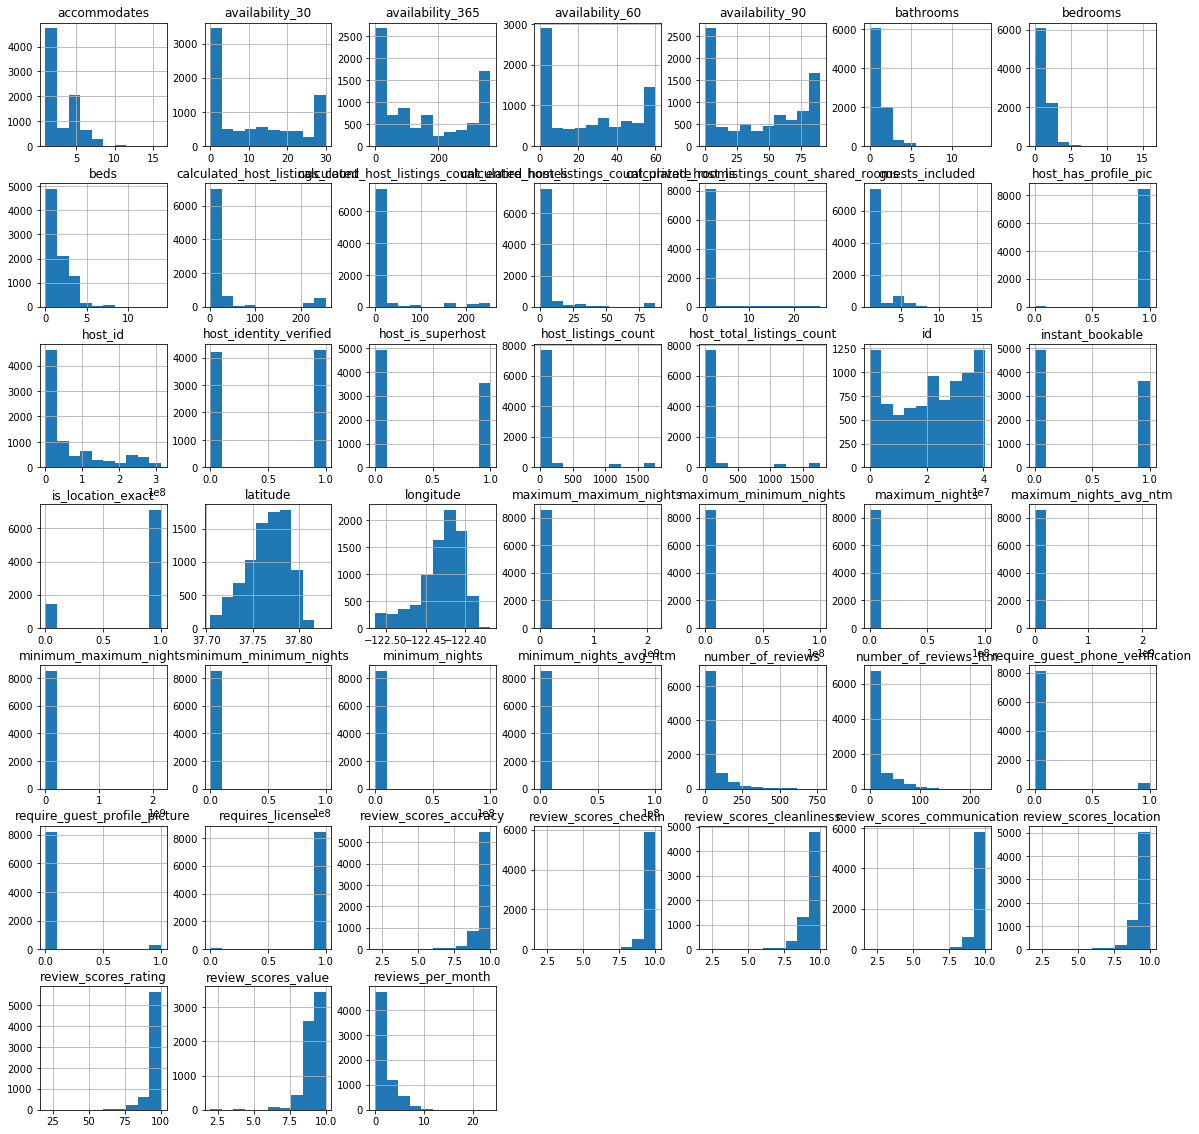

In [22]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20))
plt.show()

In [23]:
# based on the graphs above some of the columns seems to have mostly one value so will drop those
df.drop(['maximum_nights_avg_ntm' , 'minimum_nights_avg_ntm' , 'maximum_maximum_nights', 'minimum_maximum_nights', 'maximum_minimum_nights', 'minimum_minimum_nights','requires_license','require_guest_profile_picture','is_location_exact','host_listings_count','require_guest_phone_verification','host_has_profile_pic','minimum_nights','maximum_nights'], axis=1, inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 55 columns):
id                                              8533 non-null int64
host_id                                         8533 non-null int64
host_since                                      8479 non-null object
host_response_time                              7533 non-null object
host_response_rate                              7533 non-null object
host_is_superhost                               8479 non-null float64
host_total_listings_count                       8479 non-null float64
host_identity_verified                          8479 non-null float64
street                                          8533 non-null object
neighbourhood                                   8523 non-null object
neighbourhood_cleansed                          8533 non-null object
city                                            8523 non-null object
state                                           8526 non-null ob

In [26]:
#dropping more columns regarding Host since our focus is to predic the price and we will not consider the relationship to the host for this problem
columns_to_drop =['number_of_reviews','number_of_reviews_ltm','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','cancellation_policy','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month','host_response_time','host_response_rate']  
df = df.drop(columns_to_drop, axis = 1)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 35 columns):
id                           8533 non-null int64
host_id                      8533 non-null int64
host_since                   8479 non-null object
host_is_superhost            8479 non-null float64
host_total_listings_count    8479 non-null float64
host_identity_verified       8479 non-null float64
street                       8533 non-null object
neighbourhood                8523 non-null object
neighbourhood_cleansed       8533 non-null object
city                         8523 non-null object
state                        8526 non-null object
zipcode                      8288 non-null object
market                       8513 non-null object
smart_location               8533 non-null object
latitude                     8533 non-null float64
longitude                    8533 non-null float64
property_type                8533 non-null object
room_type                    8533 non-nu

In [28]:
df.city.value_counts(dropna=False)
df.street.value_counts(dropna=False)

San Francisco, CA, United States                  8460
Daly City, CA, United States                        41
CA, CA, United States                                9
San Francisco, United States                         6
San Francisco, Ca, United States                     4
San Francisco , CA, United States                    2
Nor cal, CA, United States                           1
US, United States                                    1
South San Francisco, CA, United States               1
San Francisco, Hayes Valley, CA, United States       1
San Francisco , Ca, United States                    1
Daily city , Ça, United States                       1
San Jose, CA, United States                          1
Brisbane, CA, United States                          1
Noe Valley - San Francisco, CA, United States        1
San Franscisco, CA, United States                    1
San Fàncisco, CA, United States                      1
Name: street, dtype: int64

In [29]:
#checking for outliers
df.loc[df['street'] == 'San Jose, CA, United States']


,id,host_id,host_since,host_is_superhost,host_total_listings_count,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,availability_30,availability_60,availability_90,availability_365,jurisdiction_names
7123,35705896,107434423,2016-12-16,0.0,1068.0,0.0,"San Jose, CA, United States",Nob Hill,Nob Hill,San Jose,CA,94109,San Francisco,"San Jose, CA",37.79448,-122.41495,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",$183.00,NaN,$148.00,1,$0.00,today,0,0,0,275,"{""SAN FRANCISCO""}"


In [30]:
df.drop(df.loc[df['street'] == 'San Jose, CA, United States'].index, inplace = True)

In [31]:
df.drop('street', axis = 1, inplace=True)
df.drop('city', axis = 1, inplace=True)


In [32]:
df.state.value_counts(dropna=False)

CA     8519
NaN       7
Ca        5
Ça        1
Name: state, dtype: int64

In [33]:
df.market.value_counts(dropna=False)

San Francisco    8511
NaN                20
D.C.                1
Name: market, dtype: int64

In [34]:
# looking for the outlier "D.C." . After looking at the data it looks like this row is fine and only the value for this column is not. 
#Anyways this colum needs to be dropped
df.loc[df['market'] == 'D.C.']

,id,host_id,host_since,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,state,zipcode,market,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,availability_30,availability_60,availability_90,availability_365,jurisdiction_names
3076,16241036,6884880,2013-06-12,0.0,1.0,0.0,Noe Valley,Noe Valley,CA,94114,D.C.,"San Francisco, CA",37.75241,-122.43169,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Heating,Washer,Dryer...",$150.00,NaN,$100.00,1,$0.00,today,1,1,1,62,"{""SAN FRANCISCO""}"


In [35]:
df.smart_location.value_counts(dropna=False)

San Francisco, CA                  8460
Daly City, CA                        41
CA                                    9
San Francisco                         6
San Francisco, Ca                     4
San Francisco , CA                    2
US,                                   1
San Francisco , Ca                    1
Daily city , Ça                       1
San Francisco, Hayes Valley, CA       1
Brisbane, CA                          1
San Fàncisco, CA                      1
Nor cal, CA                           1
San Franscisco, CA                    1
South San Francisco, CA               1
Noe Valley - San Francisco, CA        1
Name: smart_location, dtype: int64

In [36]:
df.loc[df['smart_location'] == 'CA']

,id,host_id,host_since,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,state,zipcode,market,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,availability_30,availability_60,availability_90,availability_365,jurisdiction_names
4424,23294064,48005494,2015-11-02,1.0,1768.0,1.0,The Castro,Castro/Upper Market,CA,NaN,San Francisco,CA,37.76085,-122.43031,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,""...",$180.00,$500.00,$300.00,1,$0.00,3 weeks ago,25,55,85,360,NaN
4425,23294094,48005494,2015-11-02,1.0,1768.0,1.0,The Castro,Castro/Upper Market,CA,NaN,San Francisco,CA,37.76135,-122.43027,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",$300.00,$500.00,$470.00,1,$0.00,4 weeks ago,1,1,1,248,NaN
4482,23524100,48005494,2015-11-02,1.0,1768.0,1.0,South Beach,South of Market,CA,NaN,San Francisco,CA,37.77948,-122.39166,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$166.00,$500.00,$300.00,1,$0.00,3 days ago,0,0,0,0,NaN
4483,23524153,48005494,2015-11-02,1.0,1768.0,1.0,South Beach,South of Market,CA,NaN,San Francisco,CA,37.77896,-122.39193,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$242.00,$500.00,$410.00,1,$0.00,yesterday,30,60,90,288,NaN
4484,23524176,48005494,2015-11-02,1.0,1768.0,1.0,South Beach,South of Market,CA,NaN,San Francisco,CA,37.77934,-122.39242,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$223.00,$500.00,$410.00,1,$0.00,2 weeks ago,20,50,80,278,NaN
4487,23543739,48005494,2015-11-02,1.0,1768.0,1.0,Hayes Valley,Western Addition,CA,NaN,San Francisco,CA,37.77448,-122.42497,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",$145.00,$500.00,$300.00,1,$0.00,a week ago,0,15,45,320,NaN
4488,23545253,48005494,2015-11-02,1.0,1768.0,1.0,Hayes Valley,Western Addition,CA,NaN,San Francisco,CA,37.77467,-122.42547,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",$159.00,$500.00,$300.00,1,$0.00,3 days ago,0,0,0,0,NaN
4529,23684272,48005494,2015-11-02,1.0,1768.0,1.0,SoMa,South of Market,CA,NaN,San Francisco,CA,37.78298,-122.39046,Condominium,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",$171.00,$500.00,$300.00,1,$0.00,2 weeks ago,2,2,2,2,NaN
6750,34179551,48005494,2015-11-02,1.0,1768.0,1.0,Nob Hill,Nob Hill,CA,NaN,San Francisco,CA,37.79385,-122.41476,Condominium,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets all...",$182.00,$500.00,$360.00,1,$0.00,3 days ago,0,0,0,0,NaN


In [37]:
df.drop('smart_location', axis = 1, inplace=True)

In [38]:
df.jurisdiction_names.value_counts(dropna=False)

{"SAN FRANCISCO"}          8480
NaN                          51
{"Solano County"," CA"}       1
Name: jurisdiction_names, dtype: int64

In [39]:
df.drop(['state', 'market', 'jurisdiction_names'], axis=1, inplace = True)

In [40]:
df.property_type.value_counts()

Apartment             3465
House                 2375
Condominium            910
Guest suite            592
Boutique hotel         338
Hotel                  145
Townhouse              142
Loft                   132
Serviced apartment     110
Hostel                  77
Aparthotel              66
Guesthouse              45
Bed and breakfast       33
Other                   23
Resort                  18
Cottage                 17
Bungalow                15
Villa                    6
Castle                   6
Tiny house               3
Boat                     3
Cabin                    3
Earth house              2
In-law                   2
Camper/RV                2
Dome house               1
Hut                      1
Name: property_type, dtype: int64

In [41]:
df.bed_type.value_counts()

Real Bed         8460
Futon              32
Pull-out Sofa      21
Airbed             12
Couch               7
Name: bed_type, dtype: int64

In [42]:
# most have same bed type so will drop this
df.drop('bed_type', axis = 1, inplace=True)

In [43]:
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'Amazon Echo',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Balcony',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach essentials',
 'Beach view',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Bidet',
 'Body soap',
 'Breakfast',
 'Breakfast table',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling fan',
 'Central air conditioning',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Convection oven',
 'Cooking basics',
 'Crib',
 'DVD player',
 'Day bed',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Double oven',
 'Dryer',
 'EV charger',
 'Electric profiling bed',
 'Elevator',
 'En suite bathroom',
 'Espresso machine

In [44]:
import collections
total_amenities = collections.Counter(amenities_set)
count = sum(total_amenities[t] for t in total_amenities)
print (count)

186


In [45]:
df.amenities[0]

'{TV,"Cable TV",Internet,Wifi,Kitchen,"Pets live on this property",Dog(s),Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Self check-in",Keypad,"Private entrance","Pack ’n Play/travel crib","Room-darkening shades","Hot water",Microwave,"Coffee maker",Refrigerator,"Dishes and silverware",Oven}'

In [46]:
df

,id,host_id,host_since,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,availability_30,availability_60,availability_90,availability_365
0,958,1169,2008-07-31,1.0,1.0,1.0,Duboce Triangle,Western Addition,94117,37.76931,-122.43386,Apartment,Entire home/apt,3,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",$170.00,$100.00,$100.00,2,$25.00,7 weeks ago,2,4,12,71
1,3850,4921,2008-12-08,1.0,2.0,1.0,Inner Sunset,Inner Sunset,94131,37.75402,-122.45805,House,Private room,2,1.0,1.0,1.0,"{Internet,Wifi,Kitchen,Breakfast,""Free street ...",$99.00,$0.00,$10.00,2,$20.00,today,18,44,74,74
2,5858,8904,2009-03-02,0.0,2.0,1.0,Bernal Heights,Bernal Heights,94110,37.74511,-122.42102,Apartment,Entire home/apt,5,1.0,2.0,3.0,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",$235.00,NaN,$100.00,2,$0.00,2 months ago,1,1,1,1
3,7918,21994,2009-06-17,1.0,10.0,1.0,Cole Valley,Haight Ashbury,94117,37.76669,-122.45250,Apartment,Private room,2,4.0,1.0,1.0,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$65.00,$200.00,$50.00,1,$12.00,3 weeks ago,30,60,90,365
4,8142,21994,2009-06-17,1.0,10.0,1.0,Cole Valley,Haight Ashbury,94117,37.76487,-122.45183,Apartment,Private room,2,4.0,1.0,1.0,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$65.00,$200.00,$50.00,1,$12.00,4 months ago,30,60,90,365
5,8339,24215,2009-07-02,0.0,2.0,1.0,Alamo Square,Western Addition,94117,37.77525,-122.43637,Condominium,Entire home/apt,4,1.5,2.0,2.0,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$585.00,$0.00,$175.00,1,$300.00,2 weeks ago,30,60,90,365
6,8739,7149,2009-01-27,1.0,2.0,0.0,Mission District,Mission,94110,37.75919,-122.42237,Condominium,Private room,3,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Pets live on thi...",$139.00,$0.00,$50.00,2,$60.00,today,0,0,0,0
7,9225,29674,2009-08-04,1.0,1.0,1.0,Potrero Hill,Potrero Hill,94107,37.76259,-122.40543,House,Private room,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",$135.00,NaN,$50.00,1,$0.00,3 days ago,1,1,1,1
8,10251,35199,2009-08-31,1.0,1.0,1.0,Mission District,Mission,94110,37.75874,-122.41327,House,Entire home/apt,4,1.0,2.0,3.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free str...",$199.00,$500.00,$100.00,1,$0.00,3 weeks ago,0,0,0,0
9,10578,37049,2009-09-08,0.0,0.0,1.0,Nob Hill,Nob Hill,94109,37.79143,-122.41544,Apartment,Entire home/apt,2,1.0,0.0,1.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",$120.00,$500.00,$75.00,2,$0.00,4 months ago,29,59,89,364


In [ ]:

df.loc[df['amenities'].str.contains('First aid kit'), 'First_aid_kit'] = 1

In [ ]:
df.loc[df['amenities'].str.contains('Formal dining area'), 'Formal_dining_area'] = 1

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8532 entries, 0 to 8532
Data columns (total 28 columns):
id                           8532 non-null int64
host_id                      8532 non-null int64
host_since                   8478 non-null object
host_is_superhost            8478 non-null float64
host_total_listings_count    8478 non-null float64
host_identity_verified       8478 non-null float64
neighbourhood                8522 non-null object
neighbourhood_cleansed       8532 non-null object
zipcode                      8287 non-null object
latitude                     8532 non-null float64
longitude                    8532 non-null float64
property_type                8532 non-null object
room_type                    8532 non-null object
accommodates                 8532 non-null int64
bathrooms                    8527 non-null float64
bedrooms                     8529 non-null float64
beds                         8520 non-null float64
amenities                    8532 non-

In [48]:
#parsing amenities

df.loc[df['amenities'].str.contains('First aid kit'), 'First_aid_kit'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment'), 'Exercise_equipment'] = 1
df.loc[df['amenities'].str.contains('Formal dining area'), 'Formal_dining_area'] = 1
df.loc[df['amenities'].str.contains('Free parking on premises'), 'Free_on_premises_parking'] = 1
df.loc[df['amenities'].str.contains('Free street parking'), 'Free_street_parking'] = 1
df.loc[df['amenities'].str.contains('Lake access'), 'Lake_access'] = 1
df.loc[df['amenities'].str.contains('Essentials'), 'Essentials'] = 1
df.loc[df['amenities'].str.contains('Fire pit|Indoor fireplace'), 'Fire_pit'] = 1
df.loc[df['amenities'].str.contains('Flat path to guest entrance|Ground floor access|No stairs or steps to enter'), 'Flat_path_guest_entrance'] = 1
df.loc[df['amenities'].str.contains('Garden or backyard'), 'Garden_backyard'] = 1
df.loc[df['amenities'].str.contains('Hangers'), 'Hangers'] = 1
df.loc[df['amenities'].str.contains('Heat lamps'), 'Heat_lamps'] = 1
df.loc[df['amenities'].str.contains('Heated floors'), 'Heated_floors'] = 1
df.loc[df['amenities'].str.contains('Heating'), 'Heating'] = 1
df.loc[df['amenities'].str.contains('Hot water'), 'Hot water'] = 1
df.loc[df['amenities'].str.contains('Luggage dropoff allowed'), 'Luggage_dropoff'] = 1
df.loc[df['amenities'].str.contains('Mudroom'), 'Mudroom'] = 1
df.loc[df['amenities'].str.contains('Lock on bedroom door'), 'Lock_on_bedroom_door'] = 1
df.loc[df['amenities'].str.contains('Mountain view'), 'Mountain_view'] = 1
df.loc[df['amenities'].str.contains('Paid parking off premises'), 'Paid_parking_off_premises'] = 1
df.loc[df['amenities'].str.contains('toilet'), 'toilet'] = 1
df.loc[df['amenities'].str.contains('Warming drawer'), 'Warming_drawer'] = 1
df.loc[df['amenities'].str.contains('Ski-in/Ski-out'), 'Ski_In_out'] = 1
df.loc[df['amenities'].str.contains('Private living room'), 'Private living room'] = 1
df.loc[df['amenities'].str.contains('Single level home'), 'Single level home'] = 1
df.loc[df['amenities'].str.contains('Paid parking on premises'), 'Paid_parking_on_premises'] = 1
df.loc[df['amenities'].str.contains('Safety card'), 'Safety_card'] = 1
df.loc[df['amenities'].str.contains('Keypad'), 'Keypad'] = 1
df.loc[df['amenities'].str.contains('Shared gym|Shared hot tub|Shared pool'), 'shared_amenities'] = 1
df.loc[df['amenities'].str.contains('Stair gates'), 'Stair_gates'] = 1
df.loc[df['amenities'].str.contains('Standing valet'), 'Standing_valet'] = 1
df.loc[df['amenities'].str.contains('Doorman|Building staff|Host greets you'), 'Doorman_Staff'] = 1
df.loc[df['amenities'].str.contains('Laptop friendly workspace'), 'Laptop_friendly_workspace'] = 1
df.loc[df['amenities'].str.contains('Other'), 'other'] = 1
df.loc[df['amenities'].str.contains('Fax machine'), 'Fax_machine'] = 1
df.loc[df['amenities'].str.contains('Smart lock'), 'Smart_lock'] = 1
df.loc[df['amenities'].str.contains('Smoke detector|Carbon monoxide detector'), 'smoke_detector'] = 1
df.loc[df['amenities'].str.contains('Oven|Steam oven|Stove|Gas oven|Convection oven|Double oven'), 'oven'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'Elevator'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'Long_term_stays_allowed'] = 1
df.loc[df['amenities'].str.contains('Lockbox'), 'Lockbox'] = 1
df.loc[df['amenities'].str.contains('EV charger'), 'EV_charger'] = 1
df.loc[df['amenities'].str.contains('Printer'), 'Printer'] = 1
df.loc[df['amenities'].str.contains('Hammock'), 'Hammock'] = 1
df.loc[df['amenities'].str.contains('Gym'), 'Gym'] = 1
df.loc[df['amenities'].str.contains('Fire extinguisher'), 'Fire_extinguisher'] = 1
df.loc[df['amenities'].str.contains('Refrigerator|Mini fridge'), 'Refigrator'] = 1
df.loc[df['amenities'].str.contains('Outdoor parking'), 'Outdoor_parking'] = 1
df.loc[df['amenities'].str.contains('Outdoor seating|Sun loungers'), 'Outdoor_seating'] = 1
df.loc[df['amenities'].str.contains('Iron'), 'Iron'] = 1
df.loc[df['amenities'].str.contains('Kitchen|Full kitchen'), 'kitchen'] = 1
df.loc[df['amenities'].str.contains('Bath towel|Bathroom essentials|Bidet|Toilet paper|Hair dryer|Handheld shower head|Bathtub|Bathtub with bath chair|Shampoo|Body soap|Shower chair|Touchless faucets|Heated towel rack|Walk-in shower|Fixed grab bars for shower|Fixed grab bars for toilet|Private bathroom|En suite bathroom|Stand alone steam shower|Rain shower'), 'bath_and_essentials'] = 1
df.loc[df['amenities'].str.contains('Bed linens|Bedroom comforts|Extra pillows and blankets|Memory foam mattress|Extra space around bed|Firm mattress|Day bed|Pillow-top mattress|Murphy bed|Electric profiling bed'), 'bed_essentials'] = 1
df.loc[df['amenities'].str.contains('DVD player'), 'DVD_player'] = 1
df.loc[df['amenities'].str.contains('Breakfast table'), 'Breakfast_table'] = 1
df.loc[df['amenities'].str.contains('Ceiling fan'), 'Ceiling_fan'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Changing table|Children’s books and toys|Children’s dinnerware|Crib|Pack ’n Play/travel|Table corner guards|crib|Baby bath|Baby monitor|High chair|Outlet covers|Window guards|Fireplace guards|Babysitter recommendations'), 'Family_kid_friendly'] = 1
df.loc[df['amenities'].str.contains('Coffee maker| Espresso machine'), 'coffe_machine'] = 1
df.loc[df['amenities'].str.contains('Cleaning before checkout'), 'Cleaning_before_checkout'] = 1
df.loc[df['amenities'].str.contains('Cable TV|HBO GO|Projector and screen|Netflix|High-resolution computer monitor|Buzzer/wireless intercom'), 'TV_Cable_Netflix'] = 1
df.loc[df['amenities'].str.contains('Wheelchair accessible|Wide clearance to shower|Wide doorway to guest bathroom|Wide entrance|Wide entrance for guests|Wide entryway|Wide hallways|Step-free shower|Accessible-height bed|Accessible-height toilet|Disabled parking spot'), 'Accessibility'] = 1
df.loc[df['amenities'].str.contains('Internet|Wifi|Ethernet connection|Pocket wifi'), 'Internet_WiFi'] = 1
df.loc[df['amenities'].str.contains('Breakfast'),  'Breakfast'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Private hot tub|Pool|Jetted tub|Soaking tub'), 'hot_tub_pool'] = 1
df.loc[df['amenities'].str.contains('Well-lit path to entrance'), 'Well_lit_path_to_entrance'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'Suitable_for_events'] = 1
df.loc[df['amenities'].str.contains('Kitchenette|Microwave|Hot water kettle|Dishwasher|Dishes and silverware|Cooking basics'), 'Kitchenette'] = 1
df.loc[df['amenities'].str.contains('Room-darkening shades'), 'Room_darkening_shades'] = 1
df.loc[df['amenities'].str.contains('Beach essentials'), 'Beach_essentials'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront'), 'BeachFront'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'Private_entrance'] = 1
df.loc[df['amenities'].str.contains('Washer|Washer / Dryer|Dryer'), 'washer_dryer'] = 1
df.loc[df['amenities'].str.contains('24-hour check-in'), '24-hour_check-in'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'Self_check-in'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'Air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Air purifier'), 'Air_purifier'] = 1
df.loc[df['amenities'].str.contains('BBQ grill'), 'BBQ_grill'] = 1
df.loc[df['amenities'].str.contains('Balcony|Terrace|Patio or balcony'), 'Balcony'] = 1
df.loc[df['amenities'].str.contains('Wine cooler'), 'Wine_cooler'] = 1
df.loc[df['amenities'].str.contains('Waterfront'), 'Waterfront'] = 1
df.loc[df['amenities'].str.contains('Tennis court'), 'Tennis_court'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'Smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Pets allowed|Pets live on this property|Dog(s)|Cat(s)|Other pet(s)'), 'Pets'] = 1
df.loc[df['amenities'].str.contains('toilet'), 'toilet'] = 1
df.loc[df['amenities'].str.contains('Smart TV|Amazon Echo|TV|Game console|Sound system'), 'internet'] = 1
 

/Users/shabnam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:85: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [50]:
#show all the columns name
df.columns
for col in df.columns:
    print(col)
    #full_data.col.unique()

id
host_id
host_since
host_is_superhost
host_total_listings_count
host_identity_verified
neighbourhood
neighbourhood_cleansed
zipcode
latitude
longitude
property_type
room_type
accommodates
bathrooms
bedrooms
beds
amenities
price
security_deposit
cleaning_fee
guests_included
extra_people
calendar_updated
availability_30
availability_60
availability_90
availability_365
First_aid_kit
Exercise_equipment
Formal_dining_area
Free_on_premises_parking
Free_street_parking
Lake_access
Essentials
Fire_pit
Flat_path_guest_entrance
Garden_backyard
Hangers
Heat_lamps
Heated_floors
Heating
Hot water
Luggage_dropoff
Mudroom
Lock_on_bedroom_door
Mountain_view
Paid_parking_off_premises
toilet
Warming_drawer
Ski_In_out
Private living room
Single level home
Paid_parking_on_premises
Safety_card
Keypad
shared_amenities
Stair_gates
Standing_valet
Doorman_Staff
Laptop_friendly_workspace
other
Fax_machine
Smart_lock
smoke_detector
oven
Elevator
Long_term_stays_allowed
Lockbox
EV_charger
Printer
Hammock
Gym
Fir

In [ ]:
#df.loc[df['amenities'].str.contains('First aid kit'), 'First_aid_kit'] =1
#df["amenities_gym"] = 0
#df["amenities_gym"][df["amenities"].str.contains("Gym")] = 1

In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8532 entries, 0 to 8532
Columns: 112 entries, id to internet
dtypes: float64(92), int64(8), object(12)
memory usage: 7.7+ MB


In [52]:
df.isnull().sum()


id                              0
host_id                         0
host_since                     54
host_is_superhost              54
host_total_listings_count      54
host_identity_verified         54
neighbourhood                  10
neighbourhood_cleansed          0
zipcode                       245
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       5
bedrooms                        3
beds                           12
amenities                       0
price                           0
security_deposit             1758
cleaning_fee                  959
guests_included                 0
extra_people                    0
calendar_updated                0
availability_30                 0
availability_60                 0
availability_90                 0
availability_365                0
First_aid_kit                4202
Exercise_equip

In [53]:
df[df['host_since'].isnull()]

,id,host_id,host_since,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,availability_30,availability_60,availability_90,availability_365,First_aid_kit,Exercise_equipment,Formal_dining_area,Free_on_premises_parking,Free_street_parking,Lake_access,Essentials,Fire_pit,Flat_path_guest_entrance,Garden_backyard,Hangers,Heat_lamps,Heated_floors,Heating,Hot water,Luggage_dropoff,Mudroom,Lock_on_bedroom_door,Mountain_view,Paid_parking_off_premises,toilet,Warming_drawer,Ski_In_out,Private living room,Single level home,Paid_parking_on_premises,Safety_card,Keypad,shared_amenities,Stair_gates,Standing_valet,Doorman_Staff,Laptop_friendly_workspace,other,Fax_machine,Smart_lock,smoke_detector,oven,Elevator,Long_term_stays_allowed,Lockbox,EV_charger,Printer,Hammock,Gym,Fire_extinguisher,Refigrator,Outdoor_parking,Outdoor_seating,Iron,kitchen,bath_and_essentials,bed_essentials,DVD_player,Breakfast_table,Ceiling_fan,Family_kid_friendly,coffe_machine,Cleaning_before_checkout,TV_Cable_Netflix,Accessibility,Internet_WiFi,Breakfast,hot_tub_pool,Well_lit_path_to_entrance,Suitable_for_events,Kitchenette,Room_darkening_shades,Beach_essentials,BeachFront,Private_entrance,washer_dryer,24-hour_check-in,Self_check-in,Air_conditioning,Air_purifier,BBQ_grill,Balcony,Wine_cooler,Waterfront,Tennis_court,Smoking_allowed,Pets,internet
26,24685,100567,NaN,NaN,NaN,NaN,Lower Haight,Haight Ashbury,94117,37.77162,-122.43836,Apartment,Private room,1,1.0,1.0,1.0,"{TV,Wifi,Kitchen,Breakfast,""Pets live on this ...",$79.00,NaN,NaN,1,$0.00,3 months ago,4,30,59,330,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
221,308885,1588855,NaN,NaN,NaN,NaN,Telegraph Hill,North Beach,94133,37.79954,-122.40679,Apartment,Entire home/apt,4,1.0,1.0,2.0,"{TV,Internet,Wifi,Kitchen,Breakfast,""Buzzer/wi...",$99.00,$0.00,$75.00,1,$25.00,5 months ago,30,60,90,365,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
259,408471,530786,NaN,NaN,NaN,NaN,The Castro,Castro/Upper Market,94114,37.75666,-122.43607,House,Entire home/apt,6,3.0,3.0,3.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",$700.00,"$1,000.00",$150.00,1,$0.00,2 months ago,10,10,10,254,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
497,943851,736969,NaN,NaN,NaN,NaN,Mission District,Mission,94110,37.75708,-122.40801,Apartment,Entire home/apt,3,1.5,2.0,2.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Indoor f...",$136.00,$500.00,$60.00,3,$100.00,8 months ago,0,0,0,0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
636,1324086,7102527,NaN,NaN,NaN,NaN,Cow Hollow,Marina,94123,37.80035,-122.43140,Condominium,Entire home/apt,4,1.0,2.0,3.0,"{Internet,Wifi,Kitchen,""Paid parking o

In [ ]:
#We can see all these columns are Null on the 54 rows so I will drop these 54 rows.
#host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count, host_identity_verified &  

In [54]:
df = df.dropna(axis=0, subset=['host_since'])

In [55]:
df.isnull().sum()

id                              0
host_id                         0
host_since                      0
host_is_superhost               0
host_total_listings_count       0
host_identity_verified          0
neighbourhood                  10
neighbourhood_cleansed          0
zipcode                       245
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       5
bedrooms                        2
beds                           12
amenities                       0
price                           0
security_deposit             1744
cleaning_fee                  948
guests_included                 0
extra_people                    0
calendar_updated                0
availability_30                 0
availability_60                 0
availability_90                 0
availability_365                0
First_aid_kit                4176
Exercise_equip

In [56]:
df.describe()


,id,host_id,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,availability_30,availability_60,availability_90,availability_365,First_aid_kit,Exercise_equipment,Formal_dining_area,Free_on_premises_parking,Free_street_parking,Lake_access,Essentials,Fire_pit,Flat_path_guest_entrance,Garden_backyard,Hangers,Heat_lamps,Heated_floors,Heating,Hot water,Luggage_dropoff,Mudroom,Lock_on_bedroom_door,Mountain_view,Paid_parking_off_premises,toilet,Warming_drawer,Ski_In_out,Private living room,Single level home,Paid_parking_on_premises,Safety_card,Keypad,shared_amenities,Stair_gates,Standing_valet,Doorman_Staff,Laptop_friendly_workspace,other,Fax_machine,Smart_lock,smoke_detector,oven,Elevator,Long_term_stays_allowed,Lockbox,EV_charger,Printer,Hammock,Gym,Fire_extinguisher,Refigrator,Outdoor_parking,Outdoor_seating,Iron,kitchen,bath_and_essentials,bed_essentials,DVD_player,Breakfast_table,Ceiling_fan,Family_kid_friendly,coffe_machine,Cleaning_before_checkout,TV_Cable_Netflix,Accessibility,Internet_WiFi,Breakfast,hot_tub_pool,Well_lit_path_to_entrance,Suitable_for_events,Kitchenette,Room_darkening_shades,Beach_essentials,BeachFront,Private_entrance,washer_dryer,24-hour_check-in,Self_check-in,Air_conditioning,Air_purifier,BBQ_grill,Balcony,Wine_cooler,Waterfront,Tennis_court,Smoking_allowed,Pets,internet
count,8.478000e+03,8.478000e+03,8478.000000,8478.000000,8478.000000,8478.000000,8478.000000,8478.000000,8473.000000,8476.000000,8466.000000,8478.000000,8478.000000,8478.000000,8478.000000,8478.000000,4302.0,23.0,70.0,1389.0,3455.0,11.0,8170.0,1315.0,790.0,1944.0,7733.0,17.0,34.0,8012.0,5806.0,2683.0,5.0,3223.0,23.0,1047.0,304.0,9.0,1.0,1278.0,505.0,837.0,1271.0,1387.0,6.0,130.0,4.0,1459.0,6778.0,602.0,4.0,522.0,8010.0,3920.0,1699.0,2706.0,1947.0,64.0,38.0,7.0,1112.0,5719.0,4953.0,17.0,92.0,7038.0,6903.0,7842.0,4389.0,48.0,108.0,28.0,3109.0,4535.0,299.0,3542.0,918.0,8353.0,906.0,548.0,710.0,292.0,5082.0,640.0,81.0,58.0,3445.0,6091.0,1392.0,4310.0,1246.0,2.0,1037.0,1746.0,17.0,38.0,1.0,107.0,1760.0,6866.0
mean,2.140028e+07,6.781162e+07,0.417905,101.410002,0.505426,37.766361,-122.429731,3.130101,1.404756,1.339547,1.727262,1.702996,10.963317,25.382048,41.698632,151.853621,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,1.283649e+07,8.604866e+07,0.493243,340.670182,0.500000,0.022805,0.027000,1.897189,0.933434,0.928270,1.188011,1.328366,11.245004,22.505102,34.481893,136.918210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
min,9.580000e+02,2.800000e+01,0.000000,0.000000,0.000000,37.704480,-122.513060,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,9.783006e+06,4.430421e+06,0.000000,1.000000,0.000000,37.751770,-122.442447,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,12.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0

In [57]:
# now we can drop amenities
df = df.dropna(axis=0, subset=['amenities'])


In [58]:
df.head()

,id,host_id,host_since,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,availability_30,availability_60,availability_90,availability_365,First_aid_kit,Exercise_equipment,Formal_dining_area,Free_on_premises_parking,Free_street_parking,Lake_access,Essentials,Fire_pit,Flat_path_guest_entrance,Garden_backyard,Hangers,Heat_lamps,Heated_floors,Heating,Hot water,Luggage_dropoff,Mudroom,Lock_on_bedroom_door,Mountain_view,Paid_parking_off_premises,toilet,Warming_drawer,Ski_In_out,Private living room,Single level home,Paid_parking_on_premises,Safety_card,Keypad,shared_amenities,Stair_gates,Standing_valet,Doorman_Staff,Laptop_friendly_workspace,other,Fax_machine,Smart_lock,smoke_detector,oven,Elevator,Long_term_stays_allowed,Lockbox,EV_charger,Printer,Hammock,Gym,Fire_extinguisher,Refigrator,Outdoor_parking,Outdoor_seating,Iron,kitchen,bath_and_essentials,bed_essentials,DVD_player,Breakfast_table,Ceiling_fan,Family_kid_friendly,coffe_machine,Cleaning_before_checkout,TV_Cable_Netflix,Accessibility,Internet_WiFi,Breakfast,hot_tub_pool,Well_lit_path_to_entrance,Suitable_for_events,Kitchenette,Room_darkening_shades,Beach_essentials,BeachFront,Private_entrance,washer_dryer,24-hour_check-in,Self_check-in,Air_conditioning,Air_purifier,BBQ_grill,Balcony,Wine_cooler,Waterfront,Tennis_court,Smoking_allowed,Pets,internet
0,958,1169,2008-07-31,1.0,1.0,1.0,Duboce Triangle,Western Addition,94117,37.76931,-122.43386,Apartment,Entire home/apt,3,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",$170.00,$100.00,$100.00,2,$25.00,7 weeks ago,2,4,12,71,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
1,3850,4921,2008-12-08,1.0,2.0,1.0,Inner Sunset,Inner Sunset,94131,37.75402,-122.45805,House,Private room,2,1.0,1.0,1.0,"{Internet,Wifi,Kitchen,Breakfast,""Free street ...",$99.00,$0.00,$10.00,2,$20.00,today,18,44,74,74,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5858,8904,2009-03-02,0.0,2.0,1.0,Bernal Heights,Bernal Heights,94110,37.74511,-122.42102,Apartment,Entire home/apt,5,1.0,2.0,3.0,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",$235.00,NaN,$100.00,2,$0.00,2 months ago,1,1,1,1,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7918,21994,2009-06-17,1.0,10.0,1.0,Cole Valley,Haight Ashbury,94117,37.76669,-122.45250,Apartment,Private room,2,4.0,1.0,1.0,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$65.00,$200.00,$50.00,1,$12.00,3 weeks ago,30,60,90,365,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,8142,21994,2009-06-17,1.0,10.0,1.0,Cole Valley,Haight Ashbury,94117,37.76487,-122.45183,Apartment,Private room,2,4.0,1.0,1.0,"{TV,Internet,Wifi,Kitchen,""Free street 